In [1]:
pip install statsmodels

In [2]:
import pandas as pd
import datetime
from datetime import date, time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings

In [4]:
df = pd.read_csv('Superstore-Copy1.csv')
df

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,1,6/12/2017,CA-2017-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,2,West,14.6200,Corporate,6/16/2017,Second Class,California,Labels
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,1,10/11/2016,US-2016-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-383.0310,5,South,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,1,10/11/2016,US-2016-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,2.5164,2,South,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Technology,Los Angeles,United States,Ben Ferrer,0.20,1,12/24/2015,US-2015-138247,90045.0,Other,Seidio BD2-HK3IPH5-BK DILEX Case and Holster C...,17.3656,7,West,173.6560,Home Office,12/29/2015,Standard Class,California,Phones
9990,Technology,Los Angeles,United States,Ben Ferrer,0.20,1,7/12/2015,CA-2015-110184,90036.0,GE,GE DSL Phone Line Filter,28.7928,8,West,255.9360,Home Office,7/16/2015,Standard Class,California,Phones
9991,Technology,Santa Barbara,United States,Maria Etezadi,0.20,1,6/6/2017,CA-2017-160717,93101.0,Samsung,Samsung Galaxy Mega 6.3,226.7946,9,West,3023.9280,Home Office,6/11/2017,Standard Class,California,Phones
9992,Technology,Yuma,United States,Gary Hansen,0.70,1,10/16/2018,CA-2018-159282,85364.0,Other,Swingline SM12-08 MicroCut Jam Free Shredder,-479.9880,5,West,599.9850,Home Office,10/21/2018,Standard Class,Arizona,Machines


In [5]:
df.dtypes

,0
Category,object
City,object
Country,object
Customer Name,object
Discount,float64
Number of Records,int64
Order Date,object
Order ID,object
Postal Code,float64
Manufacturer,object


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

,0
Category,object
City,object
Country,object
Customer Name,object
Discount,float64
Number of Records,int64
Order Date,datetime64[ns]
Order ID,object
Postal Code,float64
Manufacturer,object


In [7]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.to_period('M')
df['month_name'] = df['Order Date'].dt.month_name()
df['quarter'] = df['Order Date'].dt.to_period('Q')
df

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,...,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category,year,month,month_name,quarter
0,Furniture,Henderson,United States,Claire Gute,0.00,1,2017-11-08,CA-2017-152156,42420.0,Bush,...,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases,2017,2017-11,November,2017Q4
1,Furniture,Henderson,United States,Claire Gute,0.00,1,2017-11-08,CA-2017-152156,42420.0,Hon,...,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs,2017,2017-11,November,2017Q4
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,1,2017-06-12,CA-2017-138688,90036.0,Universal,...,14.6200,Corporate,6/16/2017,Second Class,California,Labels,2017,2017-06,June,2017Q2
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,1,2016-10-11,US-2016-108966,33311.0,Bretford,...,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables,2016,2016-10,October,2016Q4
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,1,2016-10-11,US-2016-108966,33311.0,Eldon,...,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage,2016,2016-10,October,2016Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Technology,Los Angeles,United States,Ben Ferrer,0.20,1,2015-12-24,US-2015-138247,90045.0,Other,...,173.6560,Home Office,12/29/2015,Standard Class,California,Phones,2015,2015-12,December,2015Q4
9990,Technology,Los Angeles,United States,Ben Ferrer,0.20,1,2015-07-12,CA-2015-110184,90036.0,GE,...,255.9360,Home Office,7/16/2015,Standard Class,California,Phones,2015,2015-07,July,2015Q3
9991,Technology,Santa Barbara,United States,Maria Etezadi,0.20,1,2017-06-06,CA-2017-160717,93101.0,Samsung,...,3023.9280,Home Office,6/11/2017,Standard Class,California,Phones,2017,2017-06,June,2017Q2
9992,Technology,Yuma,United States,Gary Hansen,0.70,1,2018-10-16,CA-2018-159282,85364.0,Other,...,599.9850,Home Office,10/21/2018,Standard Class,Arizona,Machines,2018,2018-10,October,2018Q4


# YEAR - LINEAR MODELL (LINEAR REGRESSION)

In [8]:
sales_per_year = df.groupby('year')['Sales'].sum().reset_index()
sales_per_year

,year,Sales
0,2015,484247.4981
1,2016,470532.5090
2,2017,609205.5980
3,2018,733215.2552


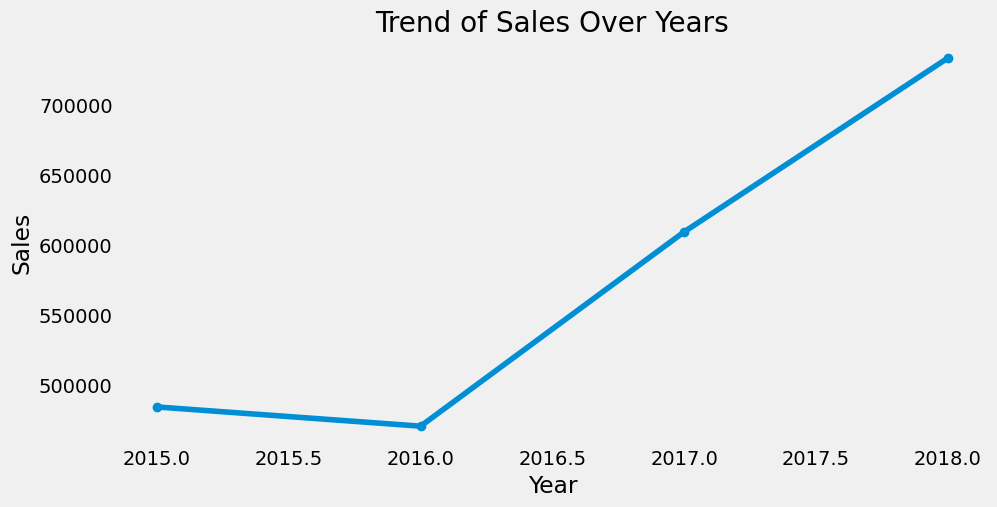

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(sales_per_year['year'], sales_per_year['Sales'], marker='o')
plt.title('Trend of Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = sales_per_year['year'].values.reshape(-1,1)
y = sales_per_year['Sales'].values

model = LinearRegression()
model.fit(x,y)

sales_per_year['Trend'] = model.predict(x)

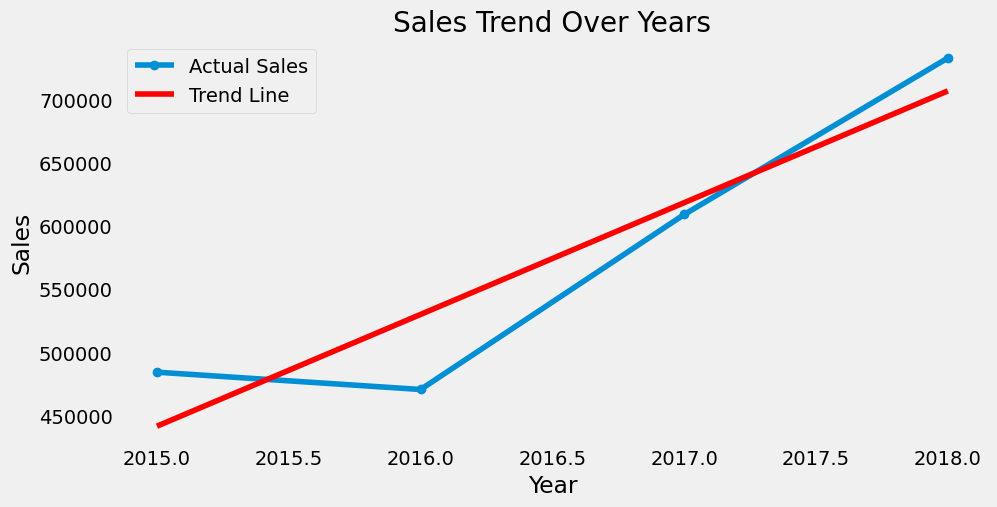

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(sales_per_year['year'], sales_per_year['Sales'], marker='o', label='Actual Sales')
plt.plot(sales_per_year['year'], sales_per_year['Trend'], color='red', label='Trend Line')
plt.title('Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [12]:
r_squared = model.score(x, y)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.86


In [13]:
# Prediksi untuk tahun 2019 dan 2020
future_years = np.array([[2019], [2020]])
future_predictions = model.predict(future_years)

# Menampilkan hasil prediksi
for year, prediction in zip(future_years.flatten(), future_predictions):
    print(f'Predicted Sales for {year}: {prediction:.2f}')

Predicted Sales for 2019: 795694.31
Predicted Sales for 2020: 884251.94


In [14]:
# Gabungkan data historis dan prediksi
forecast_years = np.concatenate((sales_per_year['year'].values, future_years.flatten()))
forecast_quantities = np.concatenate((sales_per_year['Sales'].values, future_predictions))

forecast_df = pd.DataFrame({'Year': forecast_years, 'Sales': forecast_quantities})
forecast_df


,Year,Sales
0,2015,484247.49810
1,2016,470532.50900
2,2017,609205.59800
3,2018,733215.25520
4,2019,795694.30515
5,2020,884251.94118


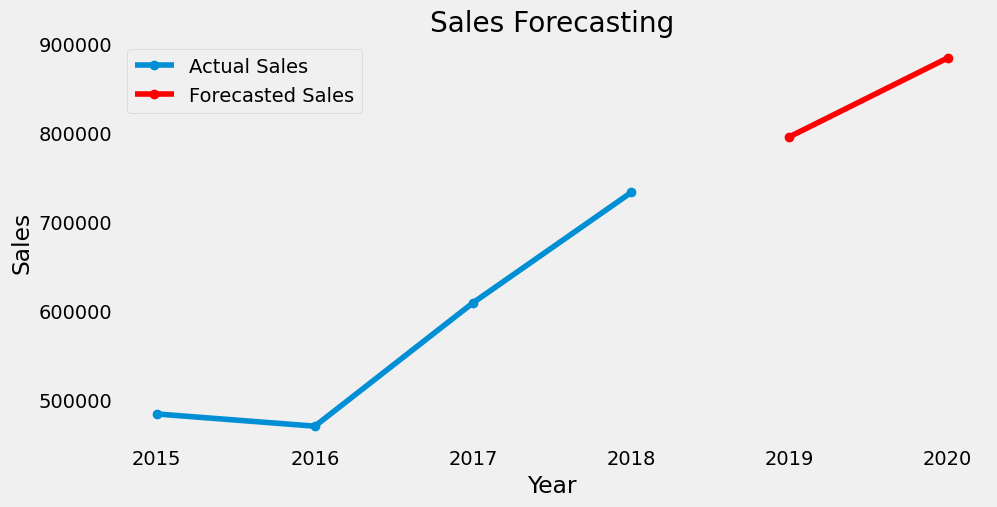

In [15]:
# Visualisasi hasil forecasting
plt.figure(figsize=(10, 5))
plt.plot(sales_per_year['year'], sales_per_year['Sales'], marker='o', label='Actual Sales')
plt.plot(future_years.flatten(), future_predictions, marker='o', color='red', label='Forecasted Sales')
plt.title('Sales Forecasting')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(np.arange(2015, 2021))
plt.legend()
plt.grid()
plt.show()

# QUARTER - SARIMA

In [16]:
sales_per_quarter = df.groupby('quarter')['Sales'].sum().reset_index()
sales_per_quarter

,quarter,Sales
0,2015Q1,74447.7960
1,2015Q2,86538.7596
2,2015Q3,143633.2123
3,2015Q4,179627.7302
4,2016Q1,68851.7386
5,2016Q2,89124.1870
6,2016Q3,130259.5752
7,2016Q4,182297.0082
8,2017Q1,93237.1810
9,2017Q2,136082.3010


In [17]:
sales_per_quarter['quarter'] = sales_per_quarter['quarter'].astype(str)
sales_per_quarter.dtypes

,0
quarter,object
Sales,float64


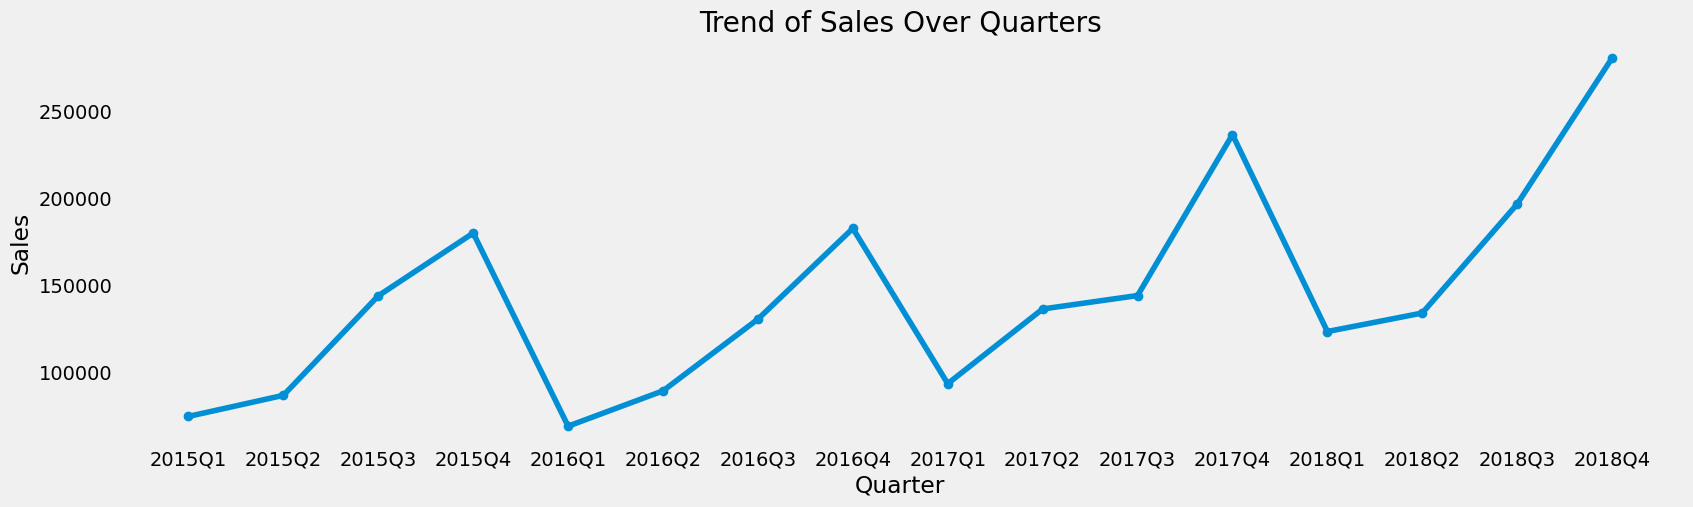

In [18]:
plt.figure(figsize=(18, 5))
plt.plot(sales_per_quarter['quarter'], sales_per_quarter['Sales'], marker='o')
plt.title('Trend of Sales Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

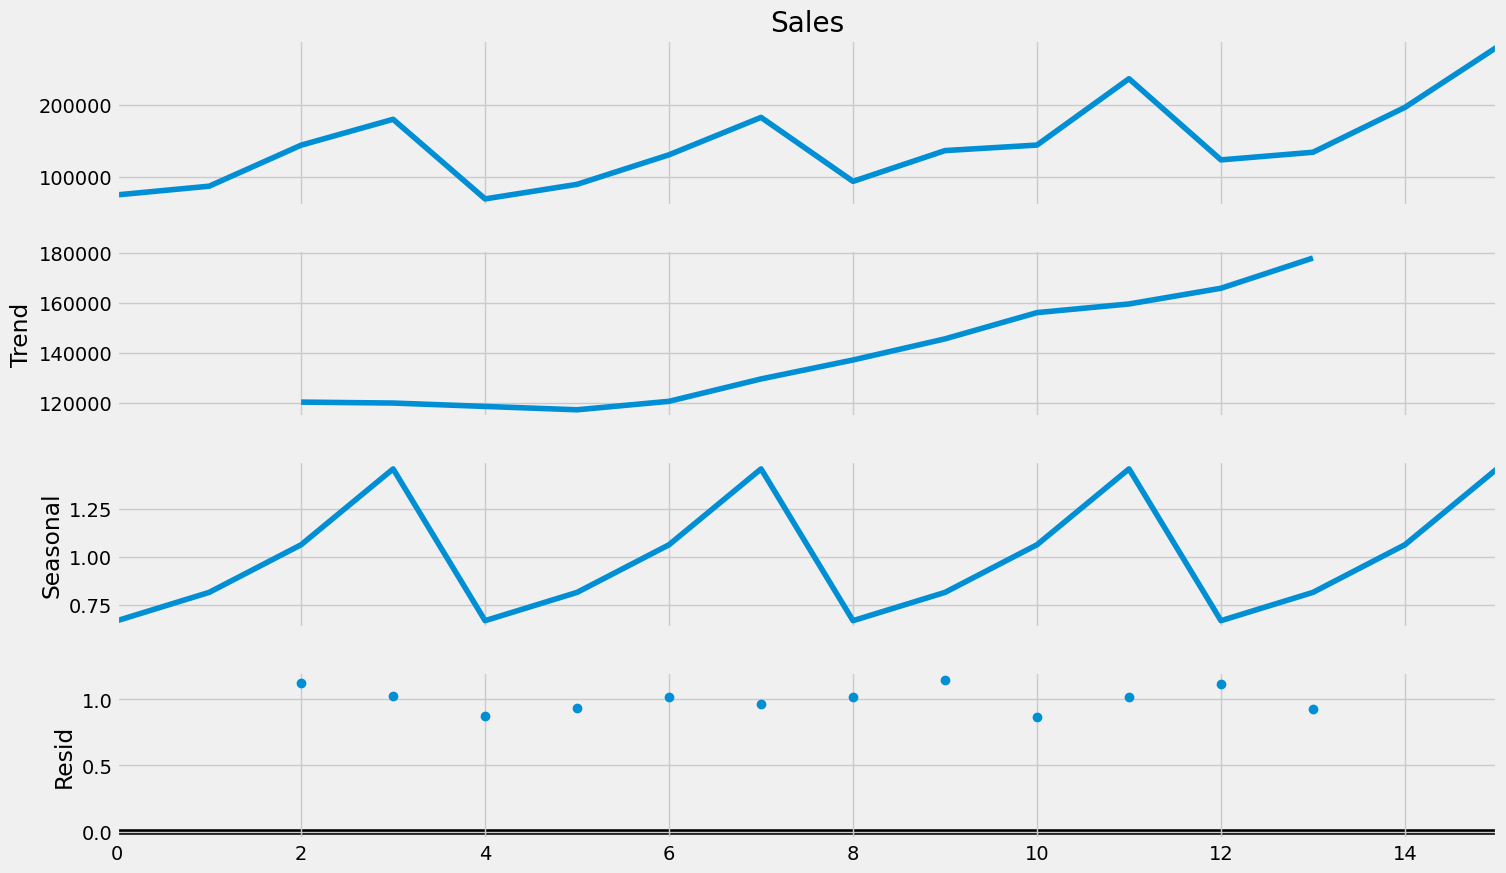

In [19]:
#mengidentifikasi komponen musiman, tren, dan residual dalam data.
result = seasonal_decompose(sales_per_quarter['Sales'], model='multiplicative', period=4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18, 10)

In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_per_quarter['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

#jika p-value < 0.05, maka dapat menolak hipotesis nol dan menyimpulkan bahwa data adalah stasioner.

ADF Statistic: -1.2227400981389287
p-value: 0.6637378059835907


In [22]:
sales_diff = sales_per_quarter['Sales'].diff().dropna()

# Uji kembali stasioneritas setelah differencing
result_diff = adfuller(sales_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

ADF Statistic: -10.75894068725196
p-value: 2.5501396431494586e-19


<Axes: >

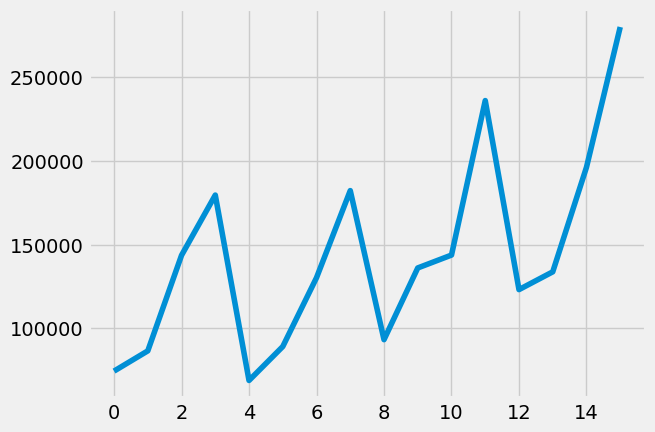

In [23]:
sales_per_quarter['Sales'].plot()

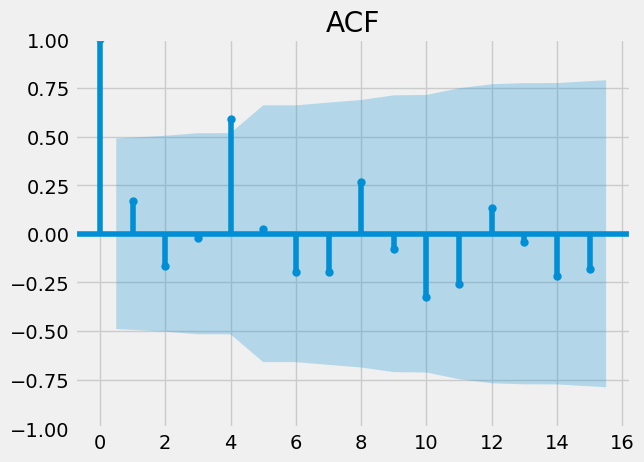

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sales_per_quarter['Sales'], lags=15)
plt.title('ACF')
plt.show()

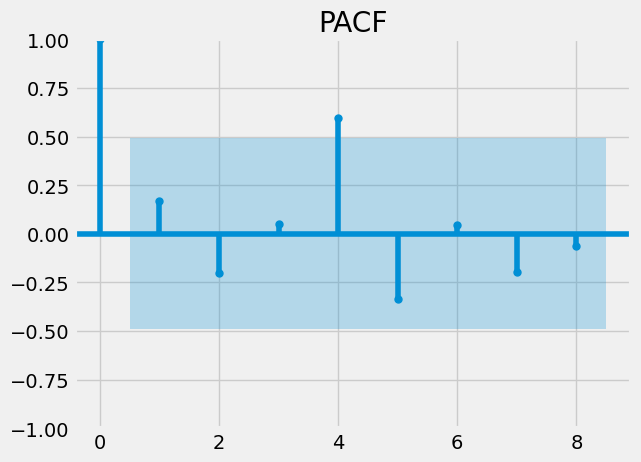

In [25]:
plot_pacf(sales_per_quarter['Sales'], lags=8)
plt.title('PACF')
plt.show()

In [26]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Membangun model SARIMA
model = SARIMAX(sales_per_quarter['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                   16
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -127.109
Date:                           Mon, 23 Dec 2024   AIC                            264.218
Time:                                   03:55:15   BIC                            266.208
Sample:                                        0   HQIC                           262.964
                                            - 16                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7598      0.596     -1.274      0.203      -1.929       0.409
ma.L1          0.6213      0.766      0.811

In [27]:
forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

16    176484.533312
17    191336.324964
18    244308.347673
19    329247.145573
Name: predicted_mean, dtype: float64


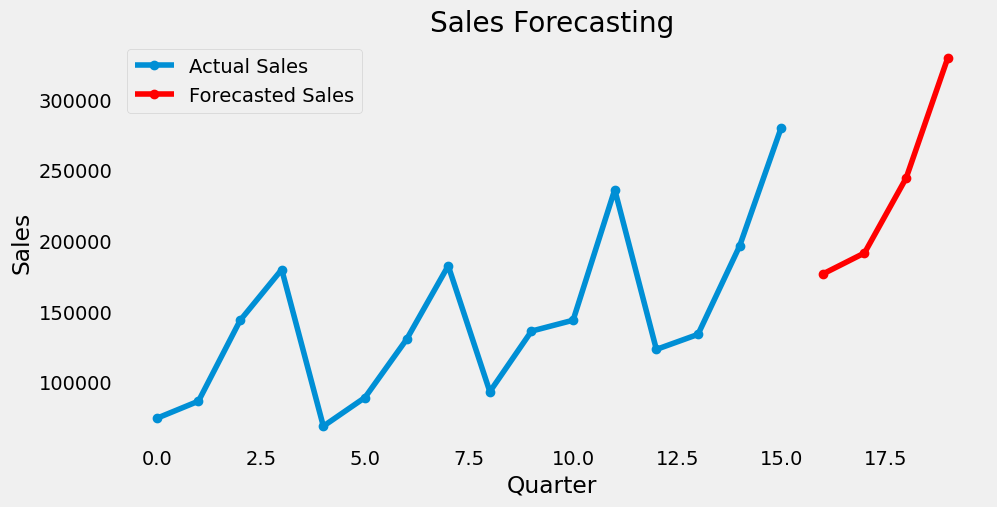

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(sales_per_quarter.index, sales_per_quarter['Sales'], marker='o', label='Actual Sales')
plt.plot(forecast.index, forecast.values, marker='o', color='red', label='Forecasted Sales')
plt.title('Sales Forecasting')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

# MONTH

In [29]:
sales_per_month = df.groupby('month')['Sales'].sum().reset_index()
sales_per_month

,month,Sales
0,2015-01,14236.8950
1,2015-02,4519.8920
2,2015-03,55691.0090
3,2015-04,28295.3450
4,2015-05,23648.2870
5,2015-06,34595.1276
6,2015-07,33946.3930
7,2015-08,27909.4685
8,2015-09,81777.3508
9,2015-10,31453.3930


In [30]:
sales_per_month['month'] = sales_per_month['month'].astype(str)
sales_per_month.dtypes

,0
month,object
Sales,float64


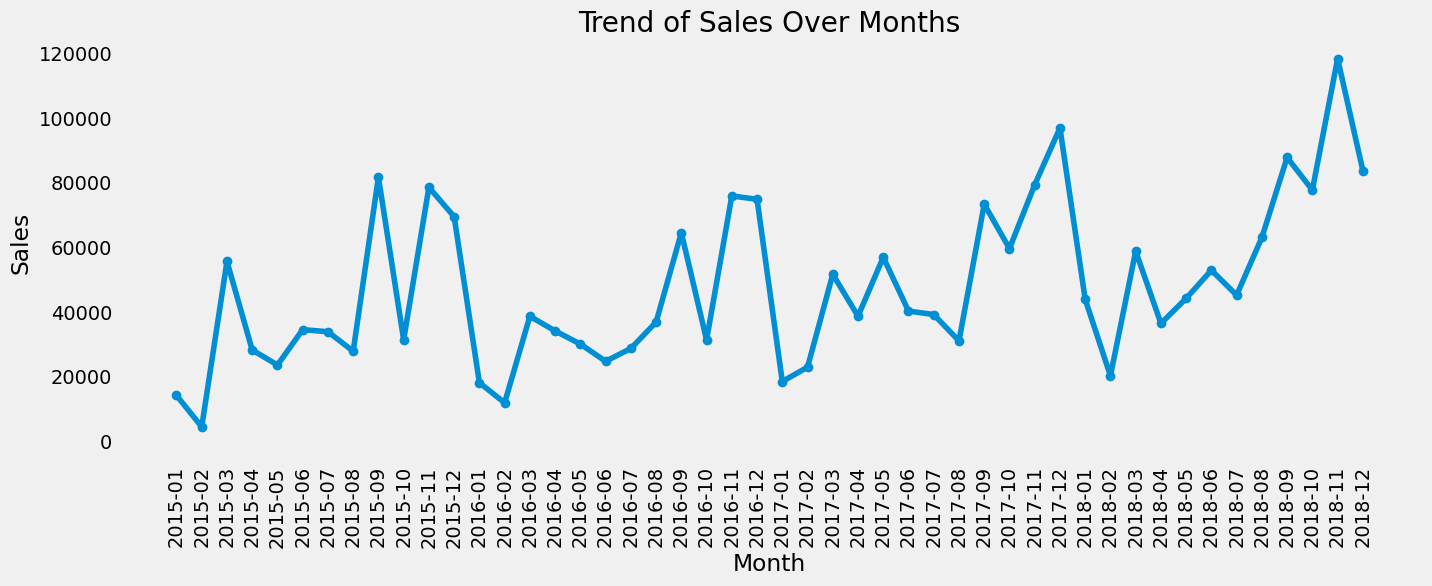

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(sales_per_month['month'], sales_per_month['Sales'], marker='o')
plt.title('Trend of Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', pad=15)
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

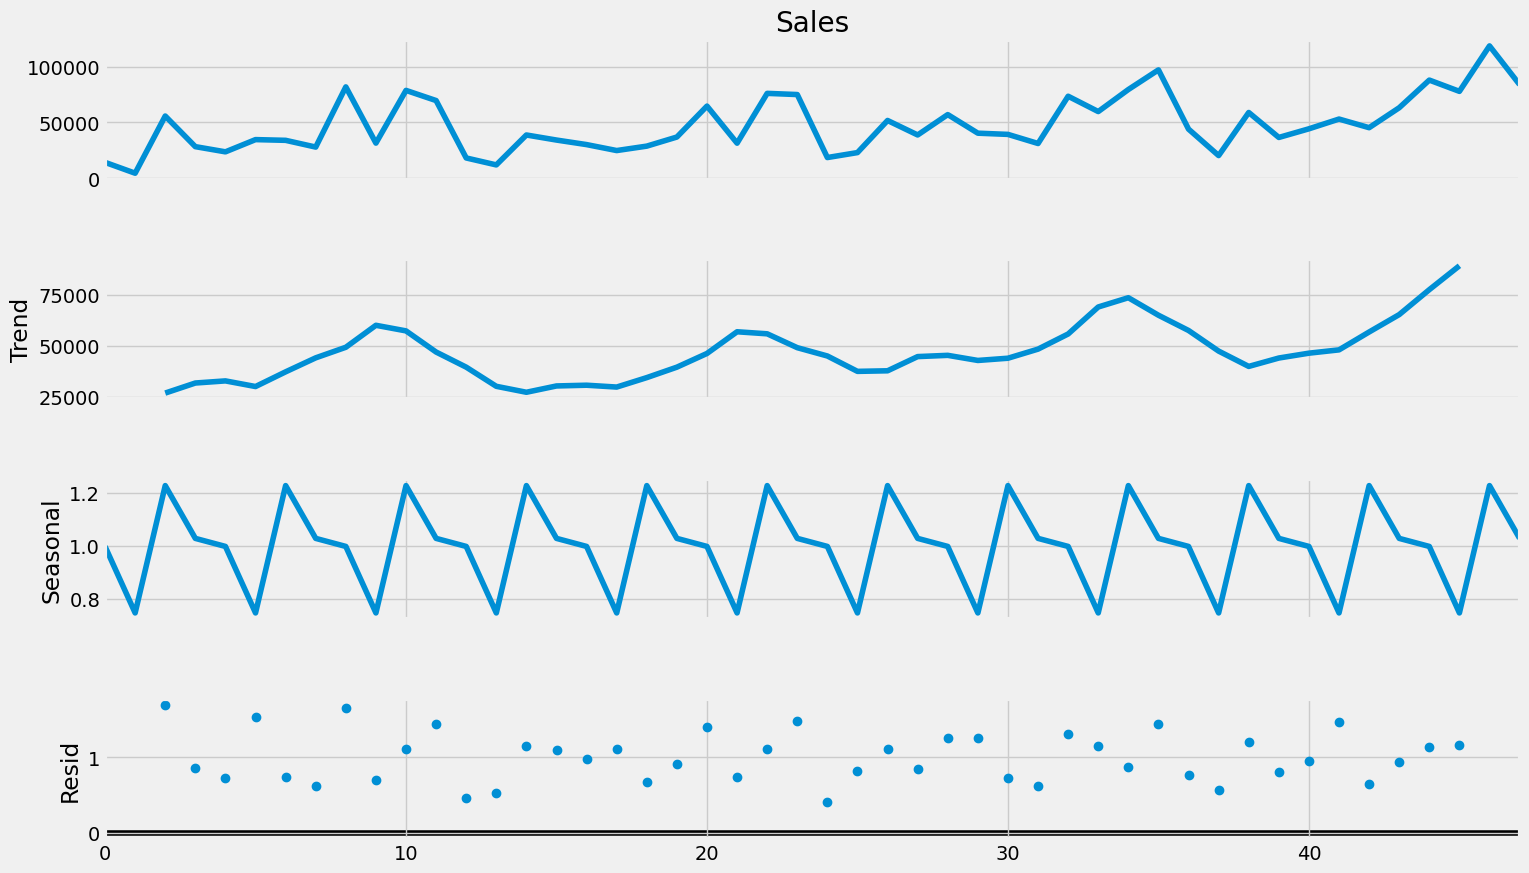

In [32]:
#mengidentifikasi komponen musiman, tren, dan residual dalam data.
result = seasonal_decompose(sales_per_month['Sales'], model='multiplicative', period=4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18, 10)

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_per_month['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

#jika p-value < 0.05, maka dapat menolak hipotesis nol dan menyimpulkan bahwa data adalah stasioner.

ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758


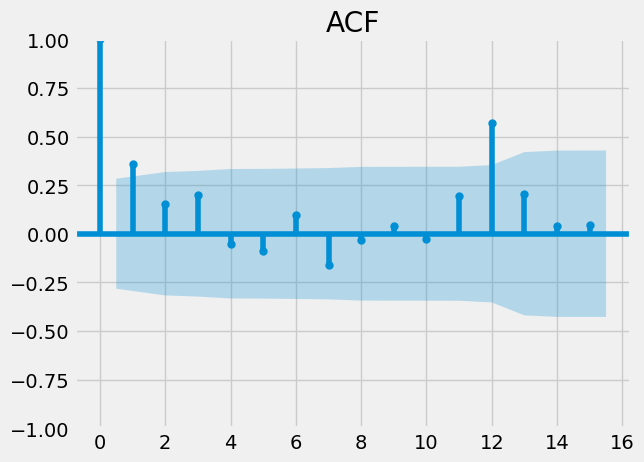

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sales_per_month['Sales'], lags=15)
plt.title('ACF')
plt.show()

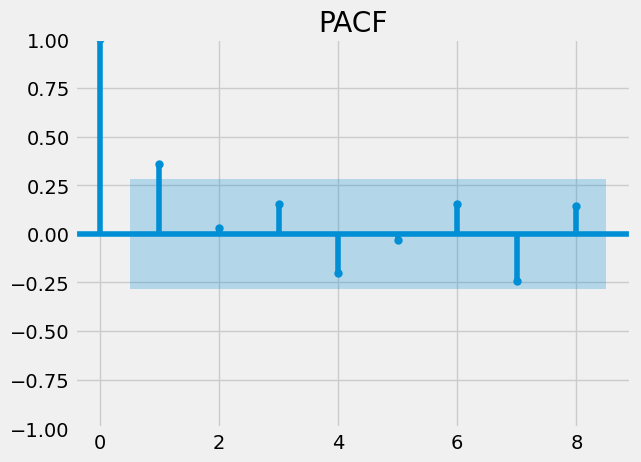

In [35]:
plot_pacf(sales_per_month['Sales'], lags=8)
plt.title('PACF')
plt.show()

In [36]:
# Membangun model SARIMA
model = SARIMAX(sales_per_month['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -383.310
Date:                            Mon, 23 Dec 2024   AIC                            776.621
Time:                                    04:09:42   BIC                            784.398
Sample:                                         0   HQIC                           779.305
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5056      0.238      2.125      0.034       0.039       0.972
ma.L1         -0.8922      0.188   

In [38]:
forecast_steps_month = 12
forecast_month = model_fit.forecast(steps=forecast_steps_month)
print(forecast_month)

48     43779.923996
49     34645.617824
50     70715.336439
51     54275.318733
52     62701.487290
53     63612.261419
54     59720.257517
55     68048.348341
56     98285.872568
57     82608.130470
58    117466.753374
59    102350.007800
Name: predicted_mean, dtype: float64


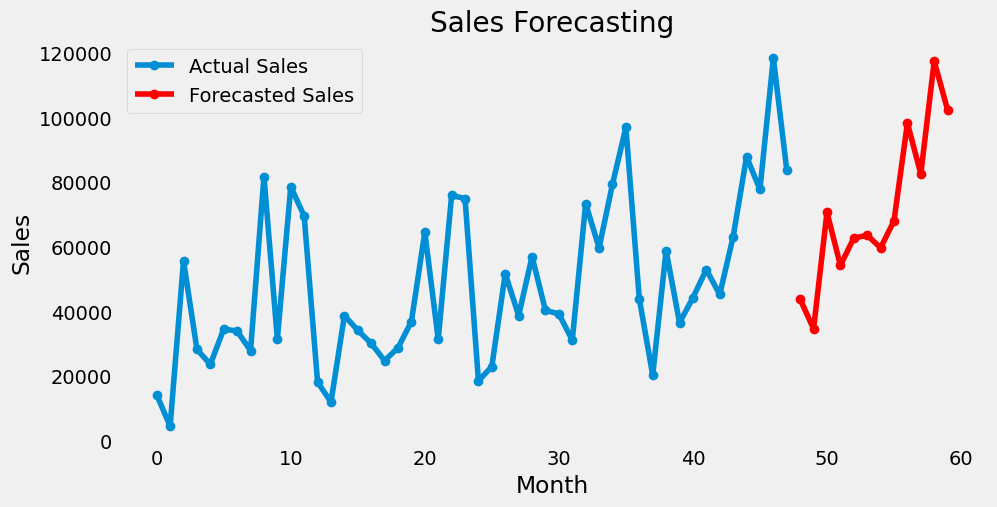

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(sales_per_month.index, sales_per_month['Sales'], marker='o', label='Actual Sales')
plt.plot(forecast_month.index, forecast_month.values, marker='o', color='red', label='Forecasted Sales')
plt.title('Sales Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()